In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("AirPassengers.csv")

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf # auto correlation function and partical auto correlation function
from statsmodels.tsa.arima_model import ARIMA 

In [5]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
df["Month"]=pd.to_datetime(df.Month)
df.index=df.Month # make index to datetime column
del df["Month"] #remove the other columns so that shape of data should be in (n,1)

In [8]:
df.shape

(144, 1)

<AxesSubplot: xlabel='Month'>

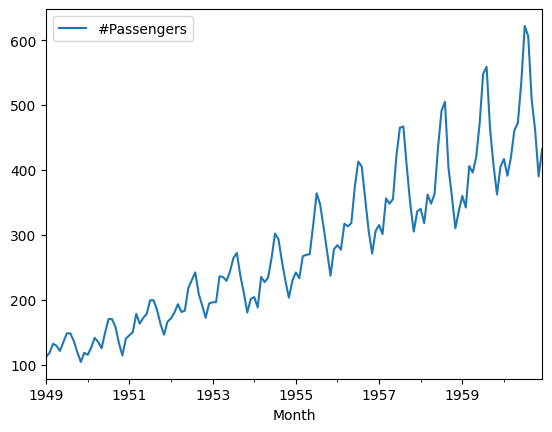

In [9]:
df.plot()

Text(0.5, 1.0, 'Rolling mean & standard deviation(Logistic Scale)')

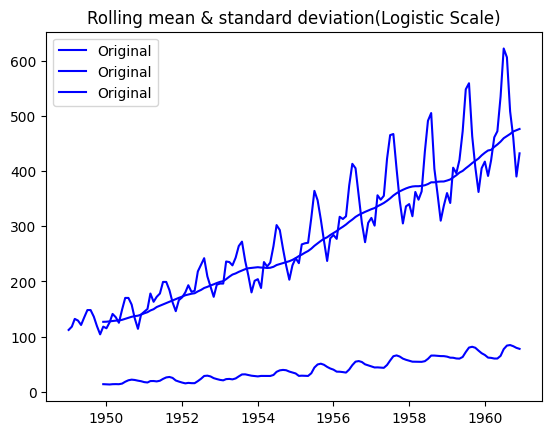

In [10]:
mean_log=df.rolling(window=12).mean() # window is 12 as here is 12 month in year so value
#is the mean of 12 month
std_log=df.rolling(window=12).std()

plt.plot(df,color='blue',label='Original')
plt.plot(mean_log,color='blue',label='Original')
plt.plot(std_log,color='blue',label='Original')
plt.legend(loc='best')
plt.title("Rolling mean & standard deviation(Logistic Scale)")

In [11]:
# Before modeling with the ARIMA Model we make sure the is stationary means there is no trend and seasonality

In [12]:
# Now we romove trend and seasonality
# Dicky-Fuller Test
from statsmodels.tsa.stattools import adfuller
result=adfuller(df["#Passengers"])
print(result) # the second vaule is p value which must be less 0.5 for reject the null hypothesis or for
# stable graph


(0.8153688792060482, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


<AxesSubplot: xlabel='Month'>

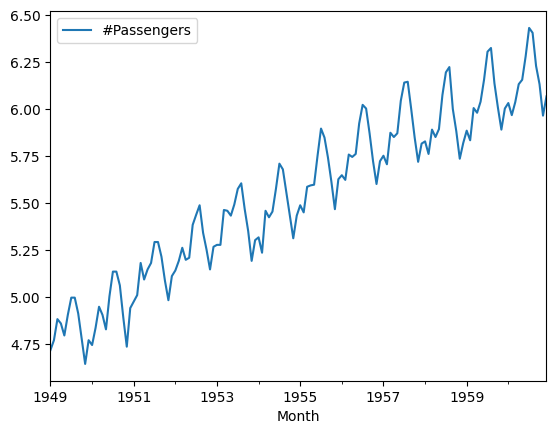

In [13]:
# log method
first_log = np.log(df)
first_log=first_log.dropna()
first_log.plot()

Text(0.5, 1.0, 'Rolling mean & standard deviation(Logistic Scale)')

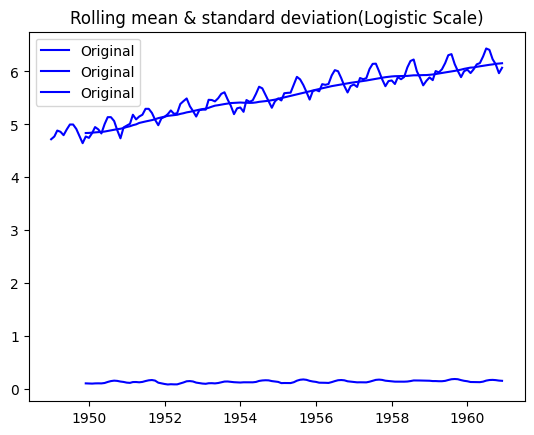

In [14]:
mean_log=first_log.rolling(window=12).mean() # window is 12 as here is 12 month in year so value
#is the mean of 12 month
std_log=first_log.rolling(window=12).std()

plt.plot(first_log,color='blue',label='Original')
plt.plot(mean_log,color='blue',label='Original')
plt.plot(std_log,color='blue',label='Original')
plt.legend(loc='best')
plt.title("Rolling mean & standard deviation(Logistic Scale)")

In [15]:
new_data=first_log - mean_log
new_data=new_data.dropna()
new_data.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [16]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(new_data["#Passengers"])
print(result)# now the second value come down from 0.5 now we go adhead for further process

(-3.162907991300869, 0.022234630001243157, 13, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, -436.63269481747034)


Text(0.5, 1.0, 'Rolling mean & standard deviation(Logistic Scale)')

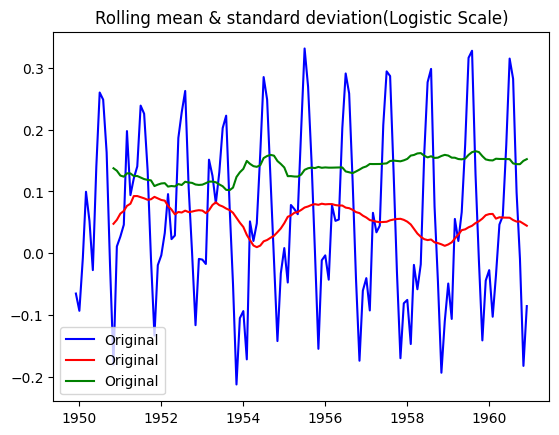

In [17]:
mean_log=new_data.rolling(window=12).mean() # window is 12 as here is 12 month in year so value
#is the mean of 12 month
std_log=new_data.rolling(window=12).std()

plt.plot(new_data,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Original')
plt.plot(std_log,color='green',label='Original')
plt.legend(loc='best')
plt.title("Rolling mean & standard deviation(Logistic Scale)")

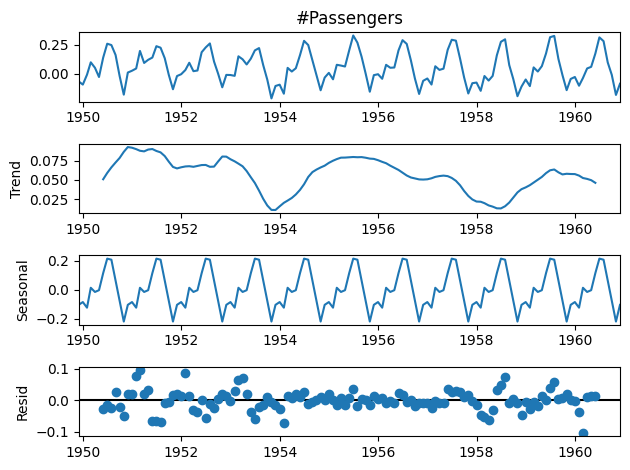

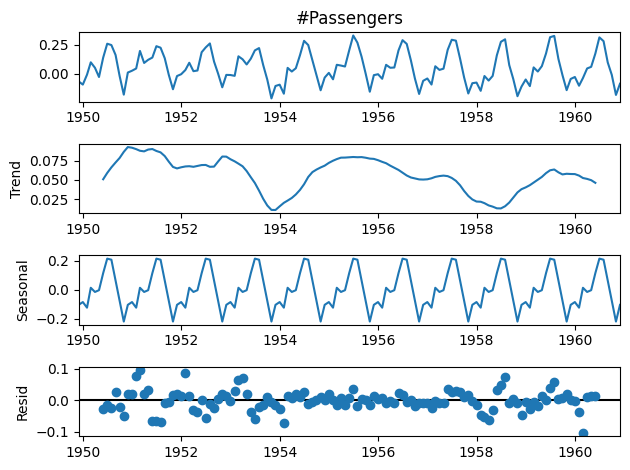

In [18]:
# sesonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
decompose_result= seasonal_decompose(new_data["#Passengers"].dropna())
decompose_result.plot()
# there is seasonality so either we have to deal with the seasonality or use a model which can deal
# with the seasonality such as SARIMA model

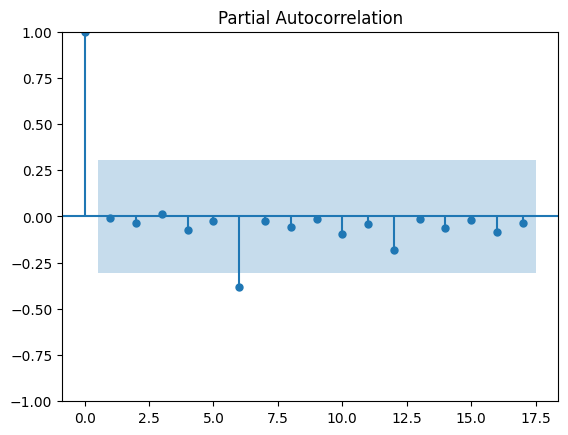

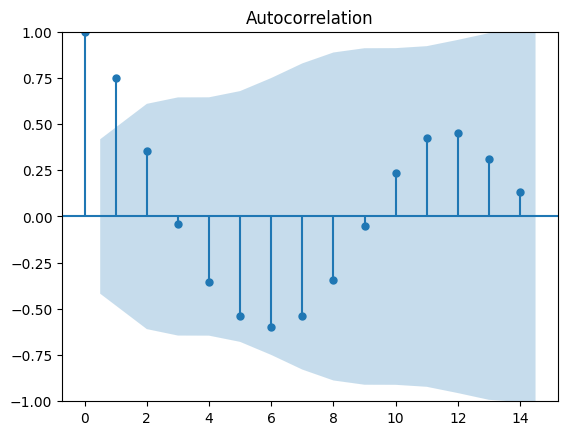

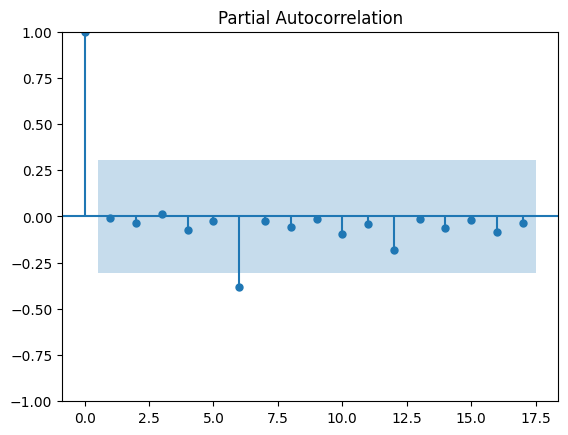

In [22]:
# model building 
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
acf_points =acf(new_data)
pacf_points=pacf(new_data,nlags=40)
plot_acf(acf_points)
plot_pacf(pacf_points)
# form acf and pacf plot we see how many stikcs in plot are outer than blue range the is the p and q
# value respectively.

In [25]:
# Arima-AR(Autoregressive),I(Integrated),Average(MA) model for time forcasting
# AR-required parameter(p)
# I- required parameter(d) which is differencing if diffencing method used earlier but here we log method
# so here I becomes zero
# MA - required parameter(q)
from statsmodels.tsa.arima_model import ARIMA

train = new_data.iloc[:120]['#Passengers']
test = new_data.iloc[121:]['#Passengers']

model = ARIMA(train, order=(1,0,2))
model_fit = model.fit()
model_fit.summary()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [36]:
df['predict'] = model_fit.predict(start= len(train), 
                                    end=len(train)+len(test)- 1, 
                                    dynamic=True)
df[['#Passengers','predict']].plot()

NameError: name 'model_fit' is not defined